In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()
     

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape


(506, 14)

In [4]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [5]:
'''=== show the statistics analysis of each attributes ==='''
#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


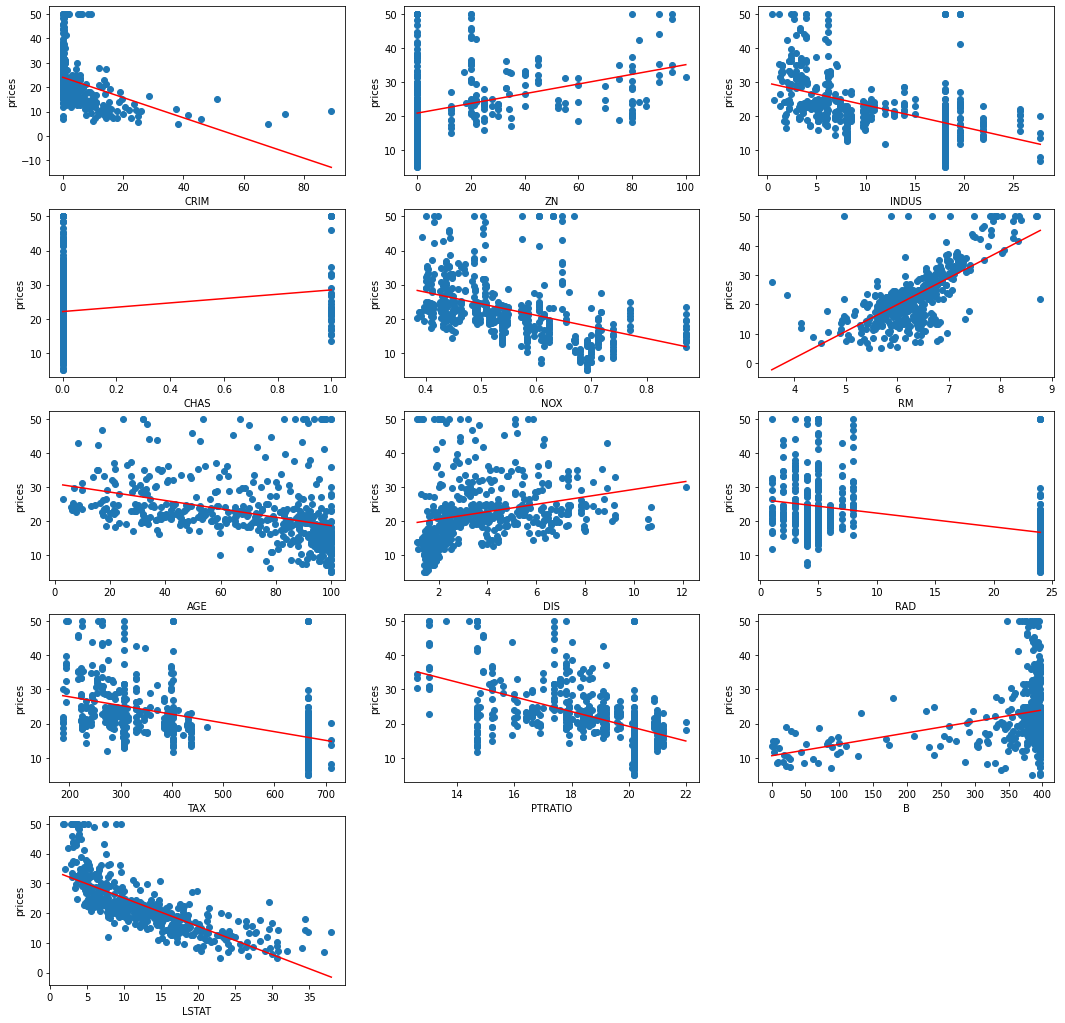

In [6]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label

In [7]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [8]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [9]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (404, 13)
testing data shape:  (102, 13)


In [10]:

'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [11]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=50, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 600.1095 - mae: 22.5740 - val_loss: 494.3138 - val_mae: 20.6098
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 437.7068 - mae: 18.4667 - val_loss: 147.4334 - val_mae: 9.3828
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 139.7902 - mae: 9.6190 - val_loss: 74.1346 - val_mae: 7.1030
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 87.9953 - mae: 6.6454 - val_loss: 68.4198 - val_mae: 5.3136
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 79.7734 - mae: 6.6004 - val_loss: 66.3059 - val_mae: 6.5109
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 73.7842 - mae: 6.4081 - val_loss: 59.4795 - val_mae: 4.9526
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 73.9932 - mae: 5.9329 - val_loss: 60.2633 - val_mae: 5.8756
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - l

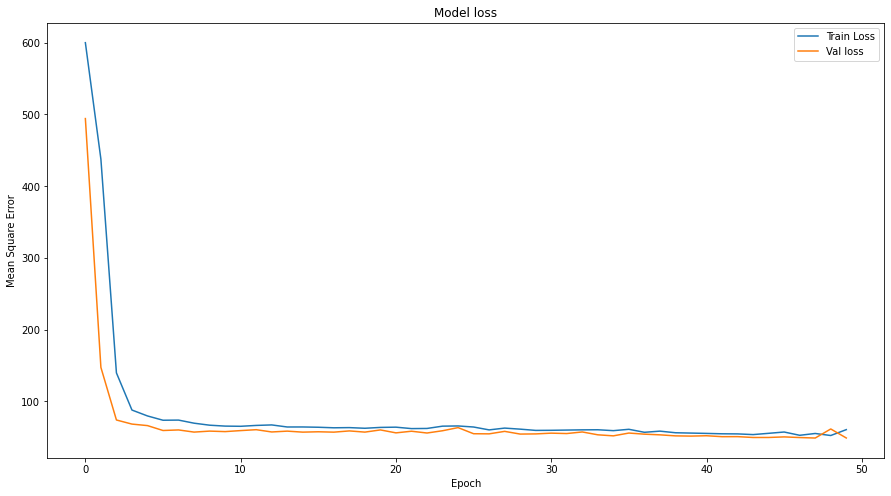

In [12]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [13]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 35.3847 - mae: 3.6784
loss value:  35.384674072265625
Mean absolute error:  3.6784212589263916


In [14]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

4/4 [==============================] - 0s 7ms/step
[24.05538  28.888132 15.542733 24.710709 16.027767 19.955347 20.40965
 16.335432 17.121359 20.367777 21.471645 20.98805   8.7084   20.458899
 22.82822  17.069675 22.097754 13.363756 30.997105 15.77346  27.781586
 27.485008 17.758488 23.6803   15.014447 15.028857 21.77012  10.965542
 21.479572 20.466034 22.318268 24.644575 15.894384 17.21736  14.589267
 14.834962 26.75531  25.705942 22.152527 23.77197  18.615396 28.495909
 32.768753 22.138296 24.696587 16.087835 18.973623 24.217163 16.59568
 25.92726  22.4588   29.057837 20.262375 22.257296 27.873514 17.719751
 16.308979 30.774532 25.152231 20.671041 24.955086 31.644697 25.472416
 19.242353 23.426624 19.74754  15.91516  26.062273 30.074451 11.210962
 24.004019 18.009365 13.158544 26.178444 21.162573 12.425685 20.744913
 32.513454 14.81333  14.196757 23.376987 13.75793  26.380987 14.387414
 22.504494 23.339184 14.49842  25.044573 26.223629 18.676895 23.917091
 11.024182 19.179754 20.5285

In [15]:

# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)
     

,True Value,Predicted Value
0,23.6,24.055380
1,32.4,28.888132
2,13.6,15.542733
3,22.8,24.710709
4,16.1,16.027767
5,20.0,19.955347
6,17.8,20.409651
7,14.0,16.335432
8,19.6,17.121359
9,16.8,20.367777


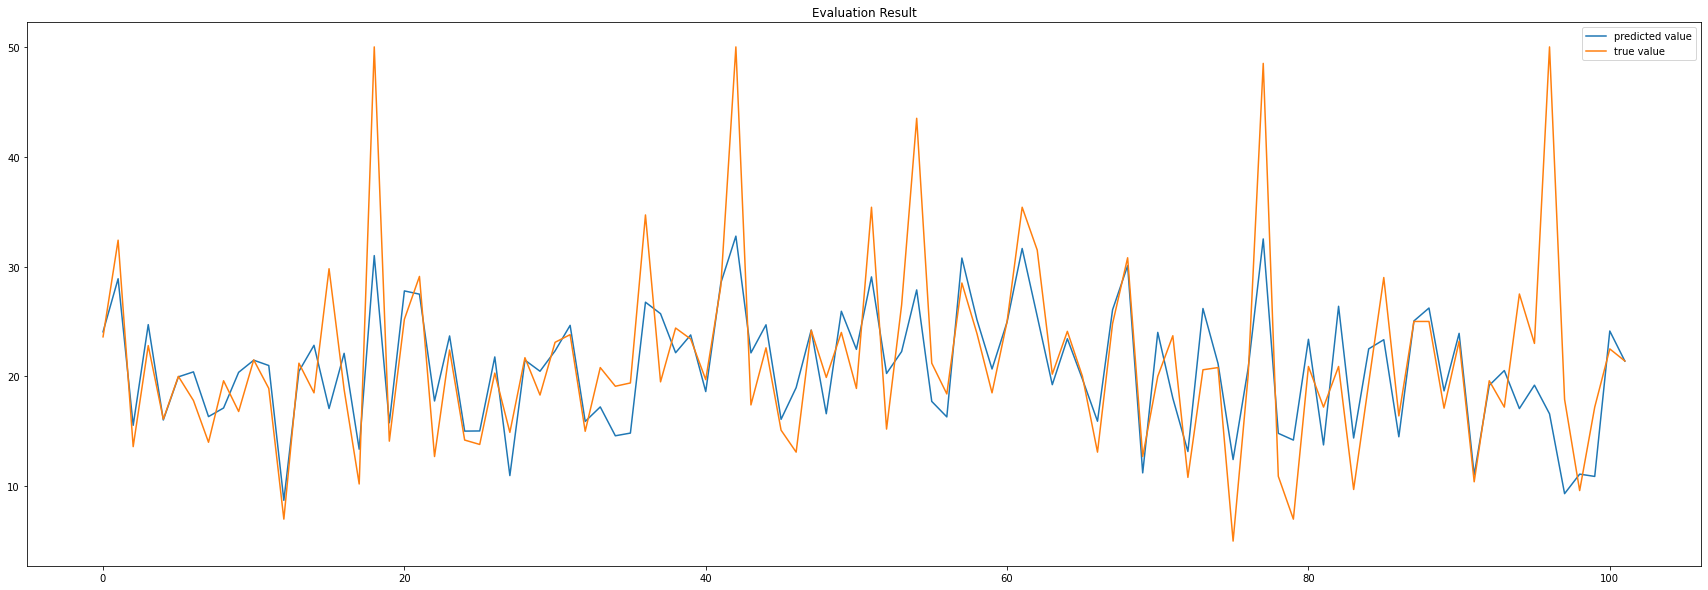

In [16]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

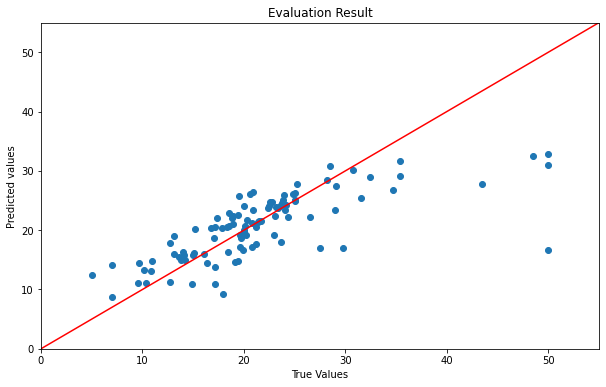

In [17]:
'''=== Visualize the model evaluation skill ==='''

# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [18]:
'''   ======= Remove outliers from the data set ========'''
#Tried to see the model perfomance after removing the outliers, the perfomance doesn't show much improvemnt. This might be less data size after remoing the outliers.
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [19]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [20]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [21]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [22]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (214, 13)
testing data shape:  (54, 13)


In [23]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [24]:
#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=30, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/30
6/6 [==============================] - 1s 38ms/step - loss: 484.2263 - mae: 21.4233 - val_loss: 429.4000 - val_mae: 20.3640
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 447.3255 - mae: 20.5250 - val_loss: 357.5392 - val_mae: 18.5137
Epoch 3/30
6/6 [==============================] - 0s 9ms/step - loss: 336.2103 - mae: 17.5573 - val_loss: 173.8597 - val_mae: 12.6022
Epoch 4/30
6/6 [==============================] - 0s 9ms/step - loss: 106.6792 - mae: 9.0270 - val_loss: 34.5514 - val_mae: 4.9650
Epoch 5/30
6/6 [==============================] - 0s 11ms/step - loss: 94.4330 - mae: 8.3458 - val_loss: 42.4956 - val_mae: 5.6289
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: 32.6497 - mae: 4.4327 - val_loss: 29.1711 - val_mae: 4.2791
Epoch 7/30
6/6 [==============================] - 0s 10ms/step - loss: 51.2727 - mae: 5.7707 - val_loss: 27.7016 - val_mae: 4.1428
Epoch 8/30
6/6 [==============================] - 0s 9ms/step - loss: 33.

In [25]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])
     

2/2 [==============================] - 0s 4ms/step - loss: 17.0145 - mae: 3.0828
loss value:  17.01449966430664
Mean absolute error:  3.0828185081481934


In [26]:
# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)
     

2/2 [==============================] - 0s 0s/step
[19.695002 23.49116  21.690384 19.442041 19.765528 22.838665 17.074358
 22.424446 22.606113 23.31042  19.36197  22.285715 23.291458 22.119068
 21.603182 23.052753 22.558933 22.689928 20.840284 19.792704 20.629759
 21.930847 20.613651 22.62022  23.332428 23.207705 20.994999 23.836758
 22.75438  20.060246 23.902882 22.827286 22.272703 17.166437 21.885063
 20.938614 19.490881 21.77904  23.668915 19.364286 21.400227 19.949894
 21.714865 17.153997 22.186275 20.699862 22.433897 22.225962 20.848541
 22.22526  16.91701  17.105757 22.7614   17.274532]


In [27]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)
     

,True Value,Predicted Value
0,23.0,19.695002
1,18.7,23.491159
2,14.5,21.690384
3,19.1,19.442041
4,18.1,19.765528
5,23.3,22.838665
6,17.7,17.074358
7,23.2,22.424446
8,18.9,22.606113
9,28.0,23.310419


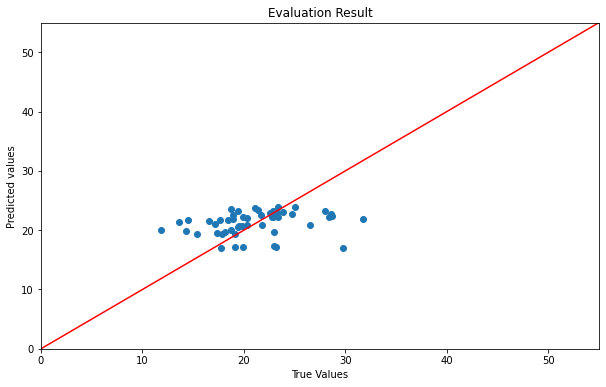

In [28]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()
     
